# Web Mining and Applied NLP (44-620)

## Web Scraping and NLP with Requests, BeautifulSoup, and spaCy

### Student Name: Trent Rueckert

### GitHub Repo: https://github.com/trentrueckert/mod6-web-scraping

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

## Question 1. 

Write code that extracts the article html from https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/ and dumps it to a .pkl (or other appropriate file)

In [4]:
import requests
import pickle

# URL of the article
url = 'https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/'

# Fetch the HTML content
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Get the HTML content from the response
    html_content = response.text
    
    # Create the filename for saving the HTML content
    filename = 'article_html.pkl'
    
    # Save the HTML content to a .pkl file using pickle
    with open(filename, 'wb') as f:
        pickle.dump(html_content, f)

    print(f"HTML content successfully saved to {filename}")
else:
    print(f"Failed to retrieve the article. HTTP Status code: {response.status_code}")

# Load the HTML content from the .pkl file
with open('article_html.pkl', 'rb') as f:
    loaded_html = pickle.load(f)

# Print the first 100 characters of the HTML content to verify it's loaded
print("\nLoaded HTML content (first 100 characters):")
print(loaded_html[:100])

HTML content successfully saved to article_html.pkl

Loaded HTML content (first 100 characters):
<!DOCTYPE html>
<html itemscope="itemscope" itemtype="http://schema.org/Article" lang="en-US">
<head


## Question 2.

Read in your article's html source from the file you created in question 1 and print it's text (use `.get_text()`)

In [9]:
from bs4 import BeautifulSoup

# Load the HTML content from the .pkl file
with open('article_html.pkl', 'rb') as f:
    loaded_html = pickle.load(f)

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(loaded_html, 'html.parser')

# Extract and print the text content of the article using .get_text()
article_text = soup.get_text()

# Print the text
print(article_text)

# Print the first 500 characters of the article's text
print(article_text[:500])  

















How Laser Headlights Work | Hackaday






































































Skip to content






Hackaday


Primary Menu

Home
Blog
Hackaday.io
Tindie
Hackaday Prize
Submit
About


Search for:



 March 27, 2021 






How Laser Headlights Work


                130 Comments            

by:
Lewin Day



March 22, 2021








When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind. Engines, fuel efficiency, and the switch to electric power are all more front of mind. However, that doesn’t mean there aren’t thousands of engineers around the world working to improve the state of the art in automotive lighting day in, day out.
Sealed beam headlights gave way to more modern designs once regulations loosened up, while bulbs moved from simple halogens to xenon HIDs and, more recently, LEDs. Now, a new technology is on the scene, with lasers!

Laser Headlights?!
BWM’s prototype 

## Question 3. 

Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [14]:
import spacy
from collections import Counter

# Initialize the spaCy pipeline
nlp = spacy.load("en_core_web_sm")

# Load the text from the HTML
article_text = soup.get_text()

# Process the text with spaCy
doc = nlp(article_text)

# Filter tokens: remove punctuation, stopwords, and whitespace
filtered_tokens = [token.text.lower() for token in doc if not token.is_punct and not token.is_stop and not token.is_space]

# Count the token frequencies
token_counts = Counter(filtered_tokens)

# Get the 5 most common tokens
most_common_tokens = token_counts.most_common(5)

# Print the 5 most common tokens with their frequencies
print("The 5 most frequent tokens and their frequencies are:")
for token, freq in most_common_tokens:
    print(f"Token: '{token}' - Frequency: {freq}")

The 5 most frequent tokens and their frequencies are:
Token: 'comment' - Frequency: 136
Token: 'march' - Frequency: 133
Token: '2021' - Frequency: 133
Token: 'says' - Frequency: 132
Token: 'report' - Frequency: 130


## Question 4. 

Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [15]:
# Initialize the spaCy pipeline
nlp = spacy.load("en_core_web_sm")

# Extract the text from the HTML
article_text = soup.get_text()

# Process the text with spaCy
doc = nlp(article_text)

# Filter tokens: remove punctuation, stopwords, and whitespace
filtered_lemmas = [token.lemma_.lower() for token in doc if not token.is_punct and not token.is_stop and not token.is_space]

# Count lemma frequencies
lemma_counts = Counter(filtered_lemmas)

# Get the 5 most common lemmas
most_common_lemmas = lemma_counts.most_common(5)

# Print the 5 most common lemmas with their frequencies
print("The 5 most frequent lemmas and their frequencies are:")
for lemma, freq in most_common_lemmas:
    print(f"Lemma: '{lemma}' - Frequency: {freq}")

The 5 most frequent lemmas and their frequencies are:
Lemma: 'comment' - Frequency: 157
Lemma: 'say' - Frequency: 134
Lemma: 'march' - Frequency: 133
Lemma: '2021' - Frequency: 133
Lemma: 'report' - Frequency: 130


## Question 5. 

Define the following methods:
    * `score_sentence_by_token(sentence, interesting_token)` that takes a sentence and a list of interesting token and returns the number of times that any of the interesting words appear in the sentence divided by the number of words in the sentence
    * `score_sentence_by_lemma(sentence, interesting_lemmas)` that takes a sentence and a list of interesting lemmas and returns the number of times that any of the interesting lemmas appear in the sentence divided by the number of words in the sentence
    
You may find some of the code from the in class notes useful; feel free to use methods (rewrite them in this cell as well).  Test them by showing the score of the first sentence in your article using the frequent tokens and frequent lemmas identified in question 3.

In [30]:
# Initialize the spaCy pipeline
nlp = spacy.load("en_core_web_sm")

def score_sentence_by_token(sentence, interesting_tokens):
    # Process the sentence with spaCy
    doc = nlp(sentence)

    # Count the number of interesting tokens
    token_count = sum(1 for token in doc if token.text.lower() in interesting_tokens)

    # Calculate the score: interesting tokens divided by total tokens in sentence
    total_words = len([token for token in doc if not token.is_space and not token.is_punct])

    if total_words> 0:
        return token_count / total_words
    else:
        return 0

def score_sentence_by_lemma(sentence, interesting_lemmas):
    # Process the sentence with spaCy
    doc = nlp(sentence)

    # Count the number of interesting tokens
    lemma_count = sum(1 for token in doc if token.lemma_.lower() in interesting_lemmas)

    # Calculate the score: interesting lemmas divided by total tokens in sentence
    total_words = len([token for token in doc if not token.is_space and not token.is_punct])
    
    if total_words > 0: 
        return lemma_count / total_words
    else:
        return 0
    
# Get the first sentence of the article
first_sentence = list(doc.sents)[0]

# Interesting tokens and lemmas (from Q3 and Q4)
interesting_tokens = ["comment", "2021", "march", "says", "report"]
interesting_lemmas = ["comment", "2021", "march", "say", "report"]

# Score the sentence by interesting tokens
token_score = score_sentence_by_token(first_sentence.text, interesting_tokens)
print(f"Token score: {token_score:.2f}")

# Score the sentence by interesting lemmas
lemma_score = score_sentence_by_lemma(first_sentence.text, interesting_lemmas)
print(f"Lemma score: {lemma_score:.2f}")

Token score: 0.09
Lemma score: 0.10


## Question 6. 

Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

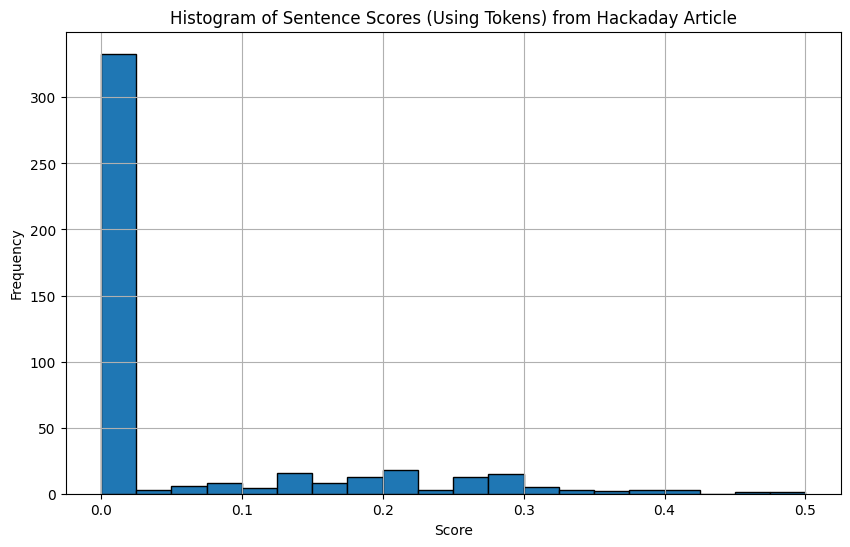

Token scores for each sentence: [0.08620689655172414, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.058823529411764705, 0.0, 0.15625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.14285714285714285, 0.0, 0.0, 0.2777777777777778, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.25, 0.22727272727272727, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.18518518518518517, 0.0, 0.21739130434782608, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.19230769230769232, 0.0, 0.0, 0.0, 0.21739130434782608, 0.0, 0.20833333333333334, 0.0, 0.25, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2631578947368421, 0.0, 0.0, 0.0, 0.08928571428571429, 0.0, 0.0, 0.09615384615384616, 0.0, 0.0, 0.19230769230769232, 0.0, 0.0, 0.0, 0.0, 0.29411764705882354, 0.0, 0.0, 0.0, 0.0625, 0.15151515151515152, 0.0, 0.0, 0.5, 0.0, 0.0, 0.263157

In [ ]:
import matplotlib.pyplot as plt

# Initialize the spaCy pipeline
nlp = spacy.load("en_core_web_sm")

# Parse the HTML content
soup = BeautifulSoup(loaded_html, 'html.parser')

# Extract the text from the HTML
article_text = soup.get_text()

def score_sentence_by_token(sentence, interesting_tokens):
    # Process the sentence with spaCy to get a doc object
    doc = nlp(sentence)

    # Count the number of interesting tokens
    token_count = sum(1 for token in doc if token.text.lower() in interesting_tokens)

    # Calculate the score: interesting tokens divided by total tokens in sentence
    total_words = len([token for token in doc if not token.is_space and not token.is_punct])

    if total_words> 0:
        return token_count / total_words
    else:
        return 0
    
# Split the article text into sentences
doc = nlp(article_text)
sentences = list(doc.sents)

# Interesting tokens (from Q3)
interesting_tokens = ["comment", "2021", "march", "says", "report"]

# List to store scores of all sentences
token_scores = []

# Iterate over each sentence in the document and calculate token scores
for sentence in doc.sents:
    score = score_sentence_by_token(sentence.text, interesting_tokens)
    token_scores.append(score)

# Histogram of sentence scores
plt.figure(figsize=(10, 6))
plt.hist(token_scores, bins=20, edgecolor='black')
plt.title('Histogram of Sentence Scores (Using Tokens) from Hackaday Article')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

print(f"Token scores for each sentence: {token_scores}")

# The most common range of scores seems to be from 0 to 0.025.

## Question 7. 

Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

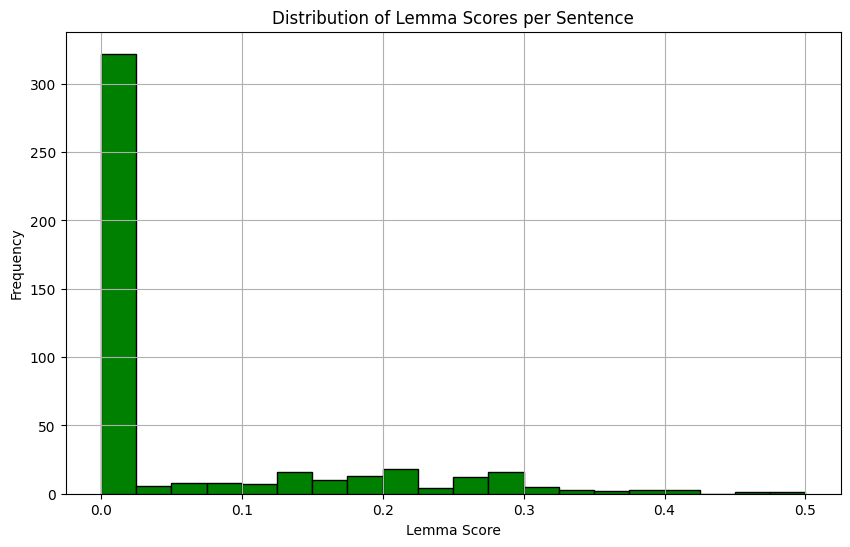

In [ ]:
def score_sentence_by_lemma(sentence, interesting_lemmas):
    # Process the sentence with spaCy
    doc = nlp(sentence)

    # Count the number of interesting tokens
    lemma_count = sum(1 for token in doc if token.lemma_.lower() in interesting_lemmas)

    # Calculate the score: interesting lemmas divided by total tokens in sentence
    total_words = len([token for token in doc if not token.is_space and not token.is_punct])
    
    if total_words > 0: 
        return lemma_count / total_words
    else:
        return 0

# Load the article text
nlp = spacy.load("en_core_web_sm")
doc = nlp(article_text)

# Interesting lemmas (from Q4)
interesting_lemmas = ["comment", "2021", "march", "say", "report"]

# List to store lemma scores of each sentence
lemma_scores = []

# Iterate over each sentence in the document and calculate lemma scores
for sentence in doc.sents:
    score = score_sentence_by_lemma(sentence.text, interesting_lemmas)
    lemma_scores.append(score)

# Plot the histogram of lemma scores
plt.figure(figsize=(10, 6))
plt.hist(lemma_scores, bins=20, edgecolor='black', color='green')
plt.title("Distribution of Lemma Scores per Sentence")
plt.xlabel("Lemma Score")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# The most common range of scores seems to be from 0 to 0.025.

## Question 8. 

Which tokens and lexems would be ommitted from the lists generated in questions 3 and 4 if we only wanted to consider nouns as interesting words?  How might we change the code to only consider nouns? Put your answer in this Markdown cell (you can edit it by double clicking it).

The ones that would be ommitted would be 2021, say, says, and March. We might change the code by filtering for nouns with something like this: 

def filter_nouns(word_list):
    filtered_words = []
    for word in word_list:
        # Process the word with spaCy to check its part of speech
        doc = nlp(word)
        # Check if the word is a noun (this includes singular and plural nouns, proper nouns, etc.)
        if doc[0].pos_ in ['NOUN', 'PROPN']:  # 'NOUN' for common nouns, 'PROPN' for proper nouns
            filtered_words.append(word)
    return filtered_words

filtered_tokens = filter_nouns(interesting_tokens)
filtered_lemmas = filter_nouns(interesting_lemmas)

In [31]:
# Convert to HTML
!jupyter nbconvert --to html web-scraping.ipynb

Active code page: 1252


[NbConvertApp] Converting notebook web-scraping.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 2 image(s).
[NbConvertApp] Writing 447578 bytes to web-scraping.html
